<a href="https://colab.research.google.com/github/Vineet2107/Natural-Language-processing/blob/main/Gaussian_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [4]:
data=pd.read_csv('/content/drive/MyDrive/titanic/test.csv',usecols=['Age','Fare'])
data.head()


,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [5]:
data.isnull().sum()

Age     86
Fare     1
dtype: int64

In [6]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [7]:
data['Age']=impute_na(data,'Age')

In [9]:
data['Fare']=impute_na(data,'Fare')

In [10]:
data.isnull().sum()

Age     0
Fare    0
dtype: int64

### **Q-Q plot**

In [12]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

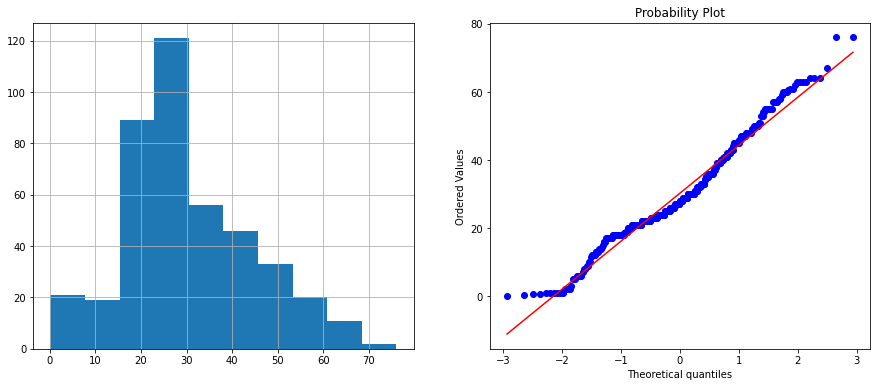

In [13]:
diagnostic_plots(data, 'Age')

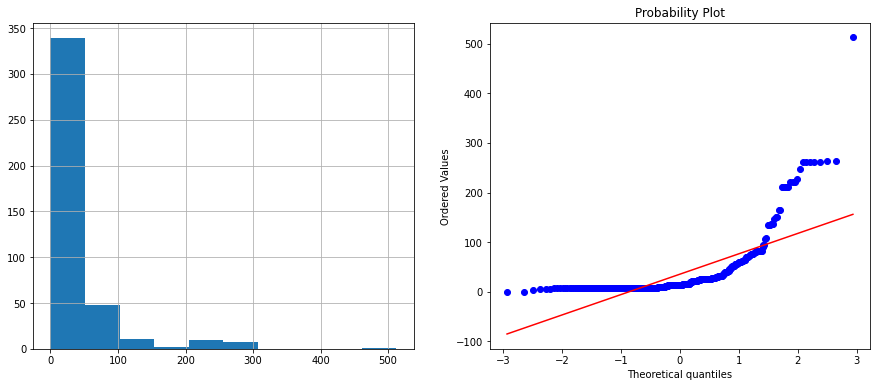

In [14]:
diagnostic_plots(data, 'Fare')

###Logarithmic Transformation

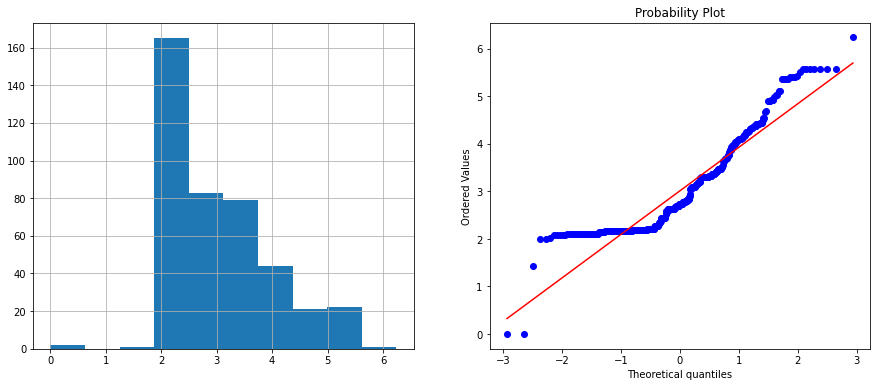

In [15]:
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

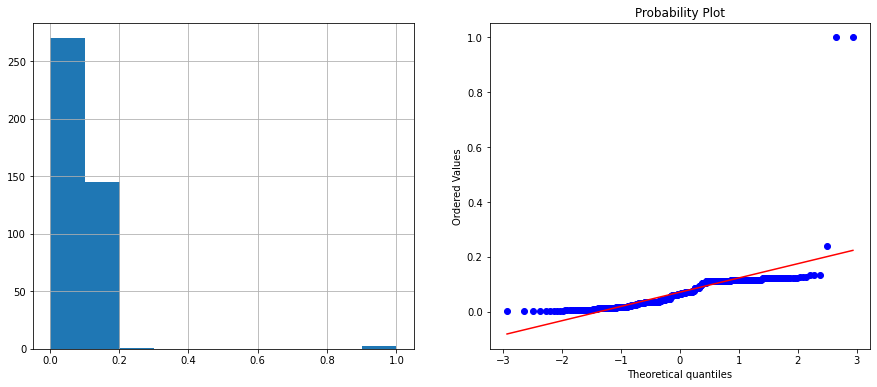

In [16]:
#Reciprocal transformation
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

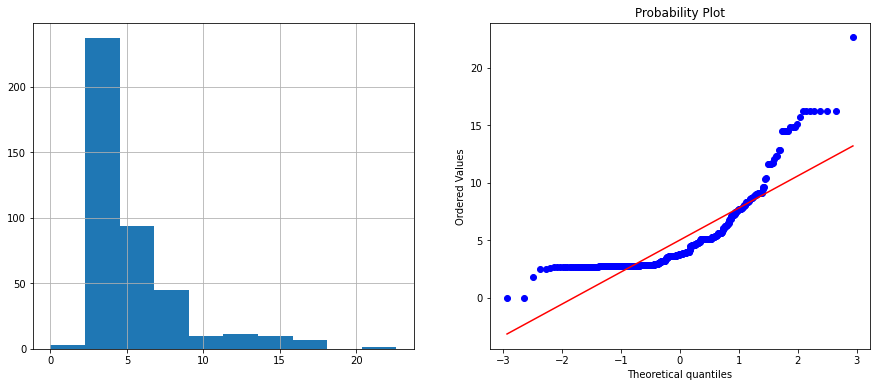

In [17]:
#Sqaure Root Tansformation
data['sqr_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'sqr_Fare')

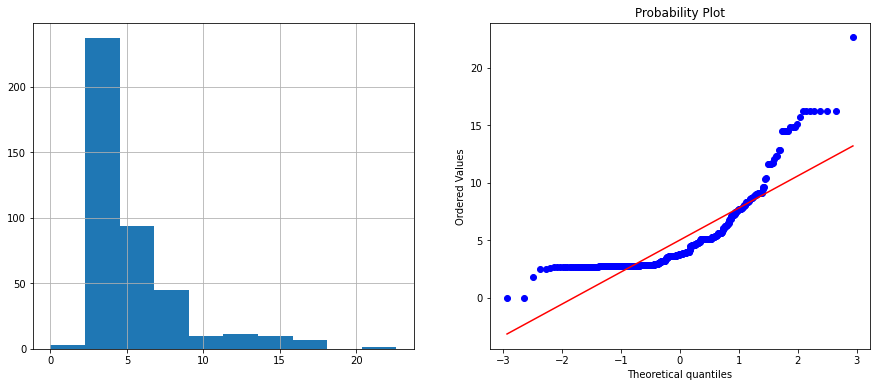

In [18]:
#Exponential Tanformation
data['Exp_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'sqr_Fare')

Optimal lambda:  -0.28367556145974393


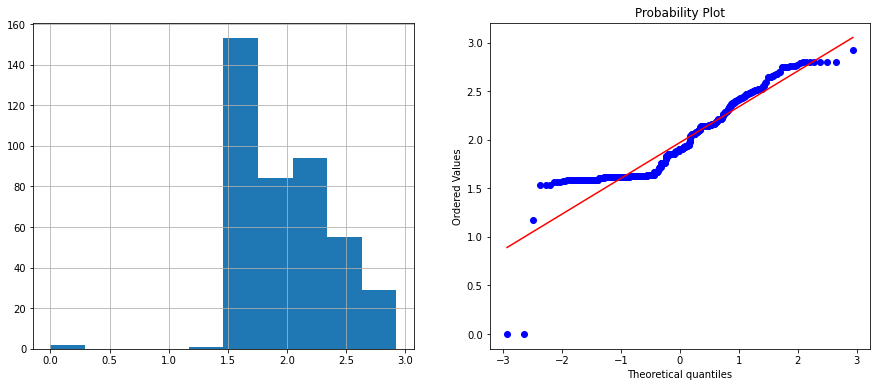

In [19]:
#BoxCox
data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')